Ejemplo 4.4.1:  El ejemplo simula una masa $m$ que oscila en un resorte con una constante de resorte $k$. Vamos a probar con diferentes valores de $k$ para ver cómo afecta el comportamiento del sistema.

El sistema de ecuaciones diferenciales para la masa en un resorte es:

$$\frac{d^2 x}{dt^2}= - \frac{k}{m}x$$

Podemos reescribir esta ecuación como un sistema de dos ecuaciones de primer orden:
$$\frac{dx}{dt}=v $$
$$\frac{dv}{dt}=-\frac{k}{m}x$$

Utilizando el método Runge-Kutta 

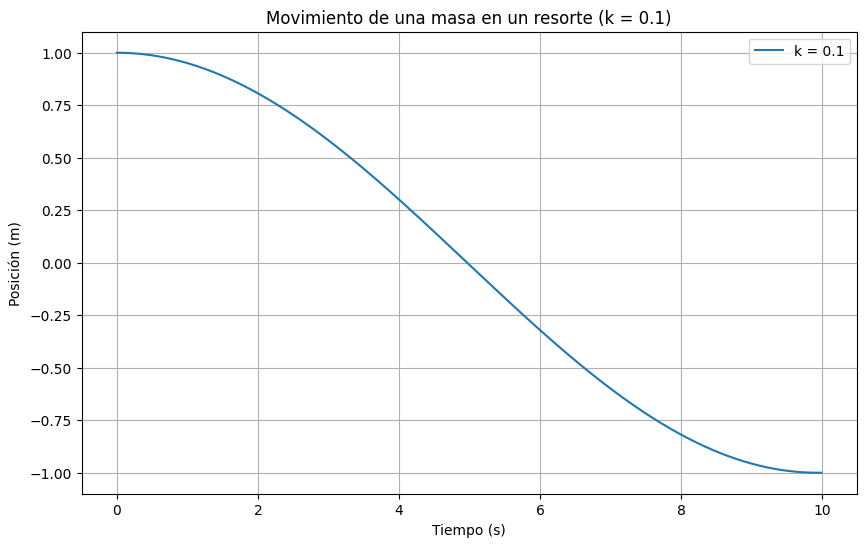

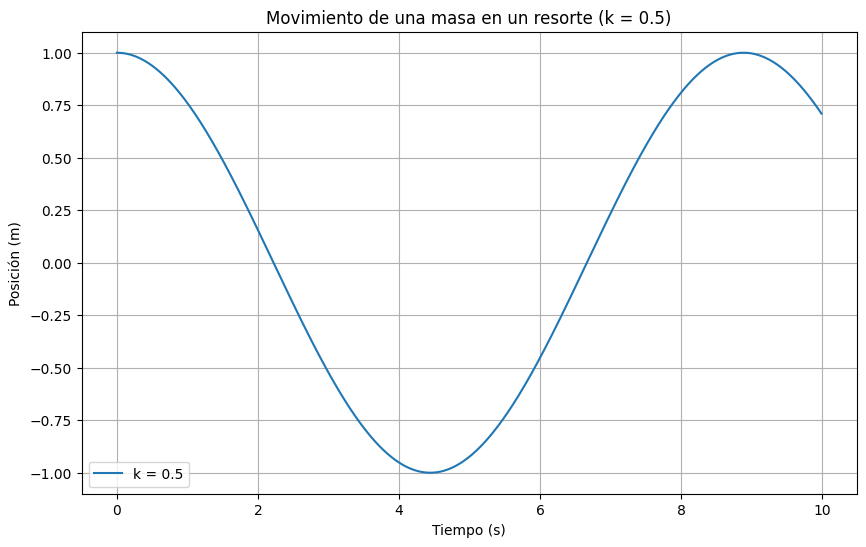

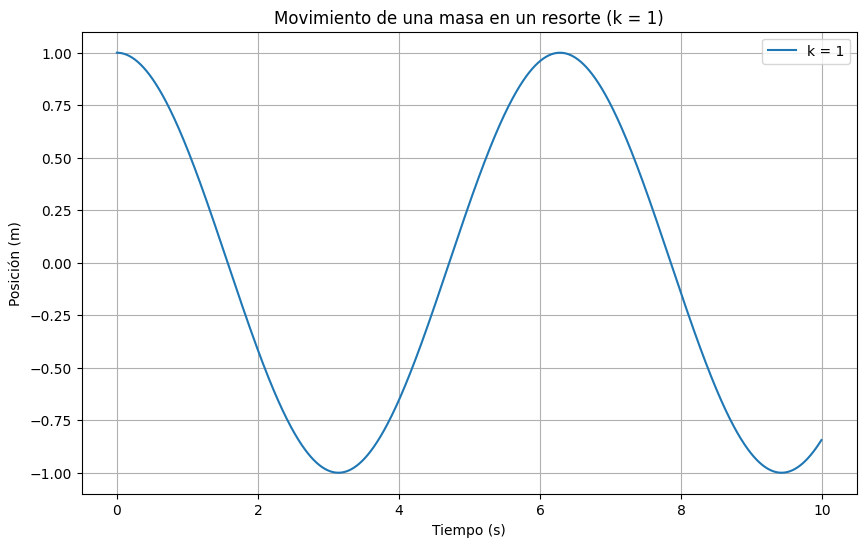

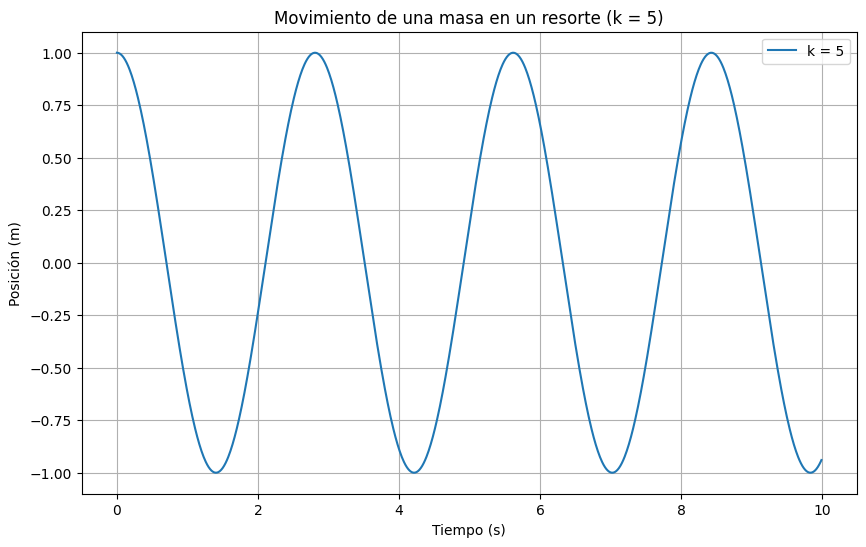

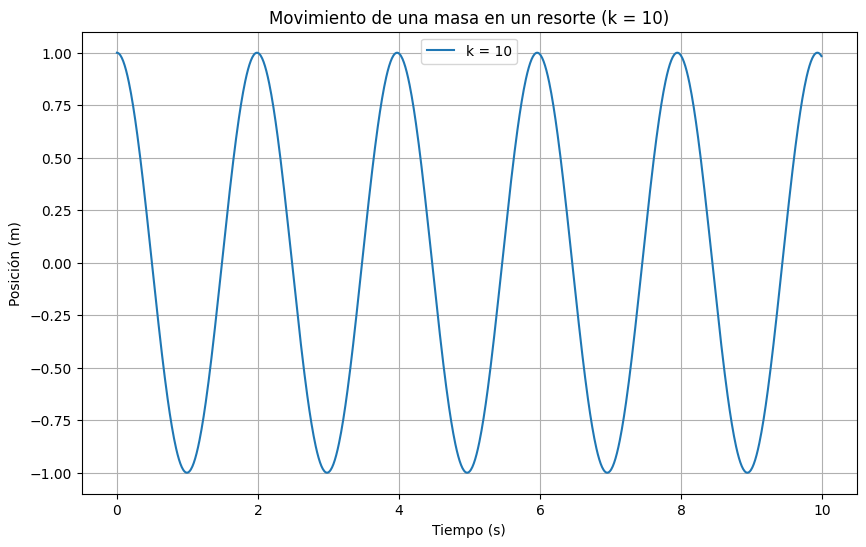

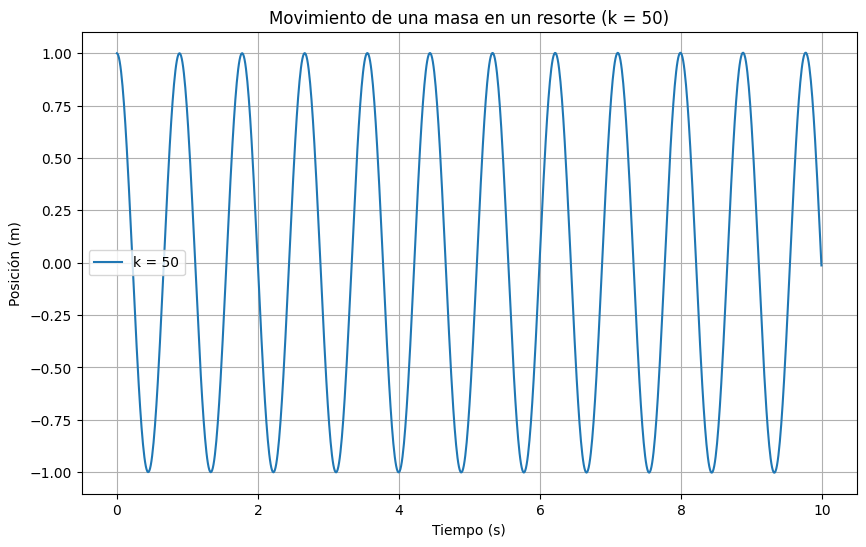

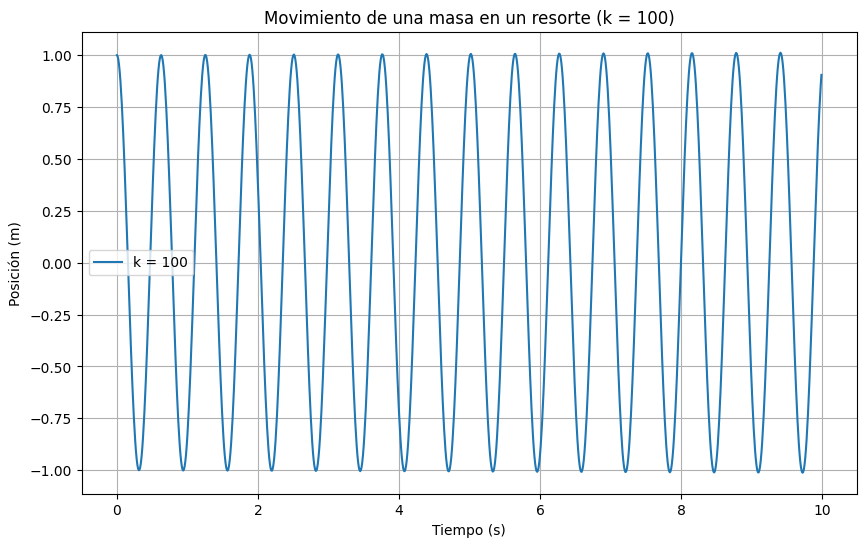

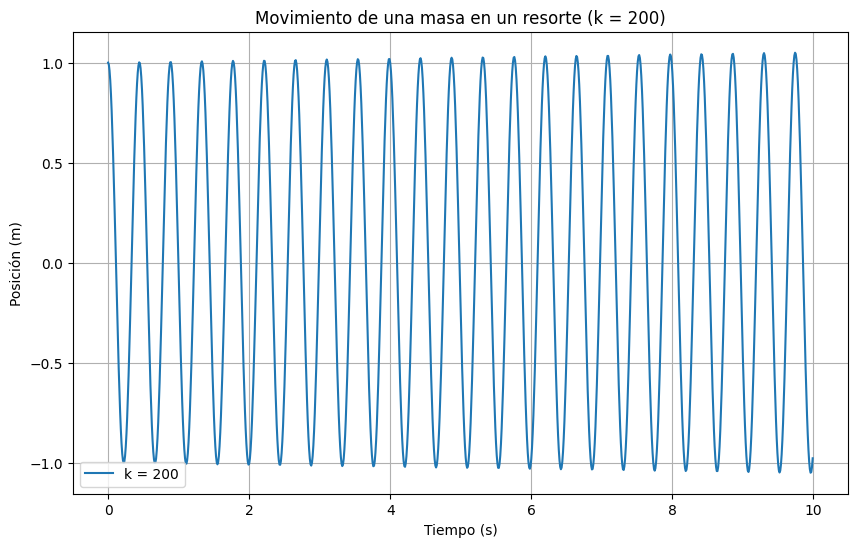

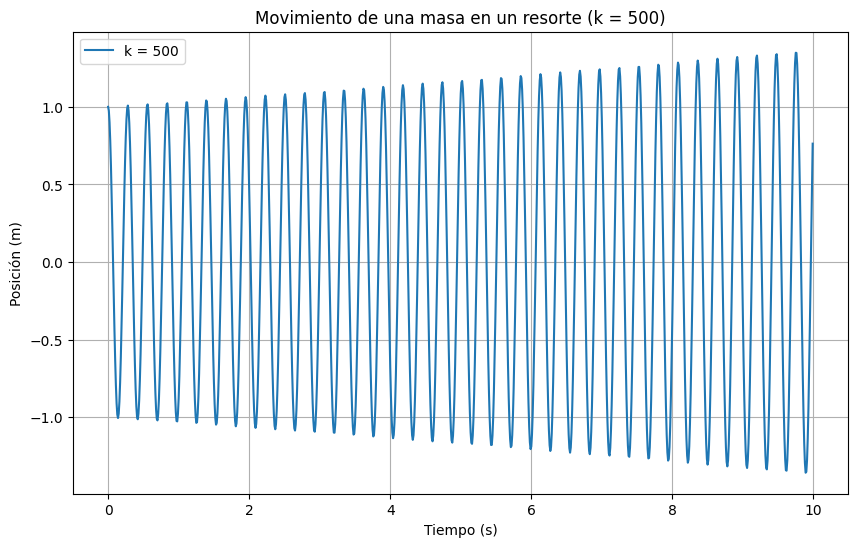

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def rk2(y, time, dt, derivs):
    """
    Esta función avanza el valor de 'y' un paso de tamaño 'dt',
    utilizando un algoritmo de Runge-Kutta de segundo orden.
    """
    k0 = dt * derivs(y, time)
    k1 = dt * derivs(y + k0, time + dt)
    y_next = y + 0.5 * (k0 + k1)

    return y_next

def derivs(y, time):
    """
    Función que devuelve las derivadas del sistema.
    y[0] representa la posición x
    y[1] representa la velocidad v
    """
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = -k/m * x
    return np.array([dxdt, dvdt])

# Parámetros del sistema
m = 1.0  # Masa (kg)
dt = 0.01  # Paso de tiempo (s)
t_max = 10.0  # Tiempo máximo de simulación (s)

# Diferentes valores de k para probar
valores_k = [0.1, 0.5, 1, 5, 10, 50, 100, 200, 500]

# Condiciones iniciales
x0 = 1.0  # Posición inicial (m)
v0 = 0.0  # Velocidad inicial (m/s)

# Simulación y graficación para cada valor de k
for idx, k in enumerate(valores_k):
    # Inicialización de las variables
    t = np.arange(0, t_max, dt)
    y = np.zeros((len(t), 2))  # Array para [x, v]
    y[0] = [x0, v0]  # Condiciones iniciales

    # Método de Runge-Kutta de segundo orden
    for i in range(1, len(t)):
        y[i] = rk2(y[i-1], t[i-1], dt, derivs)

    # Graficar la posición en función del tiempo para cada k
    plt.figure(figsize=(10, 6))
    plt.plot(t, y[:, 0], label=f'k = {k}')
    plt.title(f'Movimiento de una masa en un resorte (k = {k})')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (m)')
    plt.legend()
    plt.grid()
    plt.show()


#### Comparación de resultados 
$\bullet$ Para valores de $k$ cercanos a cero, el sistema oscilará muy lentamente o apenas mostrará oscilaciones.

$\bullet$ Para valores de $k$ en el rango de 1 a 10, el sistema mostrará oscilaciones significativas con frecuencias moderadas.

$\bullet$ Para valores de $k$ grandes (mayores a 50), las oscilaciones serán más rápidas y de mayor frecuencia, mostrando un comportamiento más rígido del resorte.

La comparación visual de estas curvas mostrará cómo el parámetro $k$ afecta la frecuencia y amplitud de las oscilaciones.